In [1]:
#pip install sciunit quantities efel scipy json2html neurom

In [2]:
#% matplotlib notebook
% matplotlib inline
from json2html import *
from quantities import mV, nA
import IPython
import json

#import sciunit
from hippounit import models
from hippounit import tests
#from hippounit import capabilities

#import matplotlib.pyplot as plt


from neuron import h




In [3]:
# Load target data
observation=json.load(open('depol_block_target_data.json'))
IPython.display.HTML(json2html.convert(json = observation))

mean_Veq,-40.1*mV
Ith_std,0.3*nA
Veq_std,3.4*mV
mean_Ith,0.6*nA


In [4]:
#so that python can interpret quantities
for key, value in observation.iteritems():
		observation[key] = eval(value)

/usr/local/lib/python2.7/dist-packages/neurom/io/neurolucida.py:263: UserWarning: This is an experimental reader. There are no guarantees regarding ability to parse Neurolucida .asc files or correctness of output.
  warnings.warn(msg)
No handlers could be found for logger "neurom.io.neurolucida"


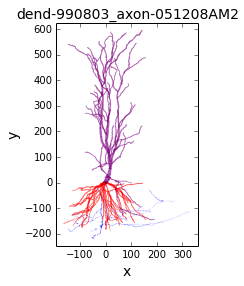

In [5]:
#Load and visualize cell model

model = models.Model()

# outputs will be saved in folders named like this:
model.name="CA1_pyr_cAC_13AUG16"

# path to mod files
model.modelpath = "/home/osboxes/bsp_data_repository-master/optimizations/CA1_pyr_cAC_13AUG16/mechanisms/"

# if this doesn't exist mod files are automatically compiled
model.libpath = "x86_64/.libs/libnrnmech.so.0"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "/home/osboxes/bsp_data_repository-master/optimizations/CA1_pyr_cAC_13AUG16/checkpoints/cell.hoc"

# If the hoc file doesn't contain a template, this must be None
model.template_name = "CCell()"

# should be None, if there is no Section List in the model for the soma
model.SomaSecList_name = "somatic"

# if the soma is not in a section list, add its name here:
#model.soma = 'soma'

model.load_mod_files() #This automatically compiles mod files, if they are not yet compiled
model.initialise() # Loads the model, creates stand alone cell from template. 
# uses the soma section list to set the location of somatic stimuli (and measurement)
# If the given section list contains more elements, the last one is used


# use this to visualize hoc morphology
'''
from PyNeuronToolbox.morphology import shapeplot
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(7,7))
shapeax = plt.subplot(111, projection='3d')
shapeax.view_init(75,66)
shapeplot(h,shapeax)
plt.show()
'''

from neurom import load_neuron
from neurom import viewer
morph_path = "/home/osboxes/bsp_data_repository-master/optimizations/CA1_pyr_cAC_13AUG16/morphology/dend-990803_axon-051208AM2.asc"
viewer.draw(load_neuron(morph_path));



In [6]:
#all the outputs will be saved here
base_directory = '/home/osboxes/BBP_project/150904_neuronunit/neuronunit/'

# Set the test
#The vectors of the somatic and dendritic voltage values are saved in files during the simulation. 
#If force_run=False, and the files already exist, the test uses the saved files for further calculations 
#If force_run=True, or the files don't exist, the test runs the whole simulation.
show_plot=True
test = tests.DepolarizationBlockTest(observation, force_run=False, base_directory=base_directory, show_plot=show_plot)


# Set the number of processes running parallel
import multiprocessing
test.npool = multiprocessing.cpu_count() - 1

- running amplitude: 0.0 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.1 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.2 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.3 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.4 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.5 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.6 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.15 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.45 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.55 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.65 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.25 on model: CA1_pyr_cAC_13AUG16 at: CCell[0].soma[0](0.5)
- running amplitude: 0.

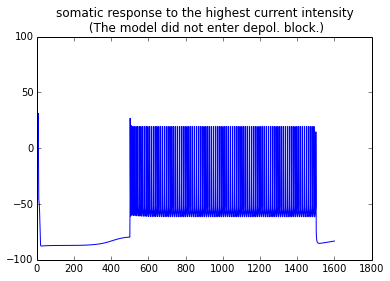

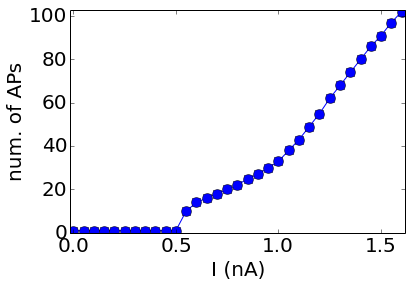

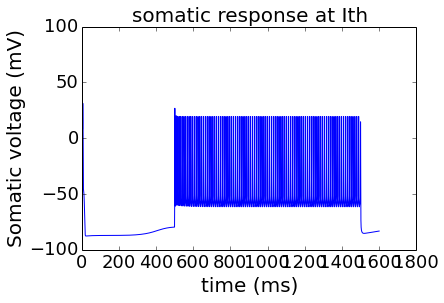

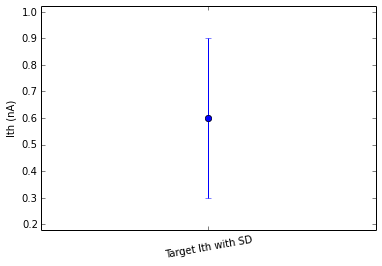

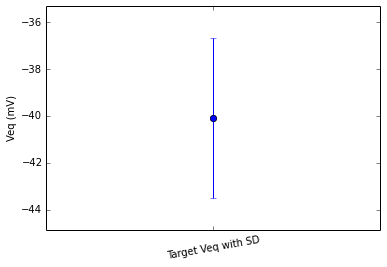

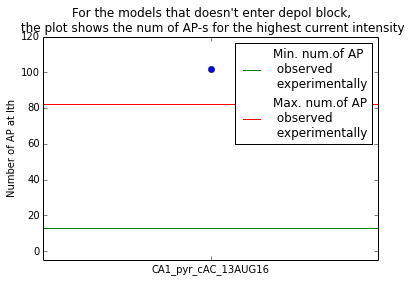

In [7]:
# Run the test
# Call SciUnit's judge function. 
#This calls the generate_prediction function of the test to generate prediction (data of model behaviour)
#Also calls the compute_score function of the test to calculate the error
score = test.judge(model)

In [8]:
# Visualize model feature values in a table
for key, value in score.prediction.iteritems():
		score.prediction[key] = str(value)
               
IPython.display.HTML(json2html.convert(json = score.prediction))

model_Ith,nan nA
model_Veq,nan mV


In [9]:
#Summarize and print the score achieved by the model on the test using SciUnit's summarize function
score.summarize()


=== Model CA1_pyr_cAC_13AUG16 (Model) achieved score Z_Ith = nan, Z_Veq = nan on test 'Depolarization block test (DepolarizationBlockTest)'. ===
